In [1]:
from operators import *
from backtest import *
import pandas as pd
import numpy as np
import os
from typing import Iterable
# import alphalens as als
import quantstats as qs
import matplotlib.pyplot as plt
import pickle
from functools import reduce
# extend pandas functionality with metrics, etc.
qs.extend_pandas()

In [2]:
target_folder_path = rf'/Users/tedting/Documents/Alpha/data'
adj_open = pd.read_pickle(rf'{target_folder_path}/adj_open.pkl')
exp_returns = adj_open.pct_change().shift(-2)

Close = pd.read_pickle(rf'{target_folder_path}/收盤價(元).pkl')
Volume = pd.read_pickle(rf'{target_folder_path}/成交量(千股).pkl')
Limit = pd.read_pickle(rf'{target_folder_path}/limit.pkl')

ZTXA = pd.read_pickle(rf'{target_folder_path}/ZTXA_close.pkl')
Benchmark = ZTXA['ZTXA 台指近月期貨指數'].pct_change().shift(-2)

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_14355/1211691609.py:3: FutureWarning: The default fill_method='pad' in DataFrame.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  exp_returns = adj_open.pct_change().shift(-2)


In [3]:
GrossProfitGrowthRate = pd.read_pickle(rf'/Users/tedting/Documents/Alpha/OFFICIAL_data_2/GrossProfitGrowthRate_q_90%.pkl')
REV_G_m = pd.read_pickle(rf'/Users/tedting/Documents/Alpha/OFFICIAL_data_2/REV_G_m_90%.pkl')
投信持股數市值 = pd.read_pickle(rf'{target_folder_path}/data_daily/投信持股數市值(百萬).pkl')
投信持股率 = pd.read_pickle(rf'{target_folder_path}/data_daily/投信持股率%.pkl')
投信週轉率 = pd.read_pickle(rf'{target_folder_path}/data_daily/投信週轉率%.pkl')

In [4]:
alpha_1_w = weight(ts_rank(GrossProfitGrowthRate,252), strategy = 'LS')
alpha_2_w = weight(ts_rank(REV_G_m,252), strategy = 'LS')
alpha_3_w = weight(cs_rank( 投信持股數市值 ), strategy = 'LS')
alpha_4_w = weight(cs_rank( 投信持股率 ), strategy = 'LS')
alpha_5_w = weight(cs_rank( ts_max( 投信週轉率 ,22) ), strategy = 'LS')

In [11]:
stocks = 10
result_df = alpha_5_w 
top = result_df.apply(lambda row: row.nlargest(stocks), axis=1)#.fillna(0)
df_cleaned = top.loc['2023-10-01':'2023-11-30'].dropna(axis=1, how='all')
df_cleaned

symbol,2059,2233,2313,2345,2353,2421,3163,3217,3324,3548,...,5439,6138,6223,6274,6290,6667,6799,8016,8210,8996
date,,,,,,,,,,,,,,,,,,,,,
2023-10-02,NaN,NaN,0.001728,0.001728,NaN,0.001732,0.001740,NaN,0.001742,NaN,...,NaN,NaN,NaN,0.001734,NaN,NaN,NaN,0.001736,0.001744,NaN
2023-10-03,NaN,NaN,0.001721,0.001721,NaN,0.001725,0.001733,NaN,0.001735,NaN,...,NaN,NaN,NaN,0.001727,NaN,NaN,NaN,0.001729,0.001738,NaN
2023-10-04,NaN,NaN,0.001711,0.001711,NaN,0.001715,0.001725,NaN,0.001727,NaN,...,NaN,NaN,NaN,0.001717,NaN,NaN,NaN,0.001721,0.001719,NaN
2023-10-05,NaN,NaN,0.001701,0.001701,NaN,0.001705,0.001715,NaN,0.001718,NaN,...,NaN,NaN,NaN,0.001707,NaN,NaN,NaN,0.001711,0.001709,NaN
2023-10-06,NaN,NaN,0.001701,0.001701,NaN,NaN,0.001715,NaN,0.001718,NaN,...,NaN,NaN,NaN,0.001707,NaN,NaN,NaN,0.001711,0.001709,NaN
2023-10-11,NaN,NaN,0.001685,0.001685,NaN,0.001700,0.001702,NaN,NaN,NaN,...,NaN,NaN,NaN,0.001692,NaN,NaN,NaN,0.001696,0.001694,NaN
2023-10-12,NaN,NaN,0.001680,NaN,NaN,0.001697,0.001699,NaN,NaN,NaN,...,NaN,NaN,0.001686,0.001688,NaN,NaN,NaN,0.001692,0.001690,NaN
2023-10-13,NaN,NaN,0.001665,NaN,NaN,0.001681,0.001683,NaN,NaN,NaN,...,NaN,NaN,0.001671,0.001673,NaN,NaN,NaN,0.001677,0.001675,NaN
2023-10-16,NaN,NaN,NaN,NaN,NaN,0.001682,0.001686,NaN,NaN,NaN,...,0.001684,NaN,0.001674,0.001676,NaN,NaN,NaN,0.001671,0.001678,NaN


In [6]:
Volume_y_avg = Volume.rolling(252).mean()
Close_y_avg = Close.rolling(252).mean()
heavy_Filter = Close_y_avg < 1000 
Volume_Filter = Volume_y_avg > 200
trade_volume_Filter = Close_y_avg * Volume_y_avg > 60000
small_aum_Filter = Volume_Filter & trade_volume_Filter
small_aum_Filter2 = Volume_Filter & trade_volume_Filter & heavy_Filter # & Limit

### 模擬實倉(Long_Position)

In [11]:
dfs = [alpha_1_w,
       alpha_2_w]

# 使用 reduce 進行累加
result_df = reduce(lambda x, y: x.add(y, fill_value=0), dfs)
result_df

symbol,000116,000930,000960,0009A0,1101,1102,1103,1104,1107,1108,...,9945,9946,9949,9950,9951,9955,9958,9960,9962,L2301
2013-01-02,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2013-01-03,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2013-01-04,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2013-01-07,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
2013-01-08,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,0.0,0.000632,0.0,0.000849,0.000607,0.001010,-0.001277,-0.000721,0.0,-0.000939,...,-0.001299,0.000662,-0.001087,0.0,-0.001277,0.000879,0.0,0.000033,-0.001725,0.0
2023-11-28,0.0,0.000630,0.0,0.000848,0.000602,0.001001,-0.001287,-0.000720,0.0,-0.000938,...,-0.001297,0.000660,-0.001087,0.0,-0.001287,0.000878,0.0,0.000034,-0.001723,0.0
2023-11-29,0.0,0.000628,0.0,0.000847,0.000586,0.000968,-0.001272,-0.000718,0.0,-0.000938,...,-0.001272,0.000658,-0.001087,0.0,-0.001272,0.000877,0.0,0.000047,-0.001708,0.0
2023-11-30,0.0,0.000626,0.0,0.000846,0.000583,0.000960,-0.001273,-0.000717,0.0,-0.000937,...,-0.001273,0.000656,-0.001088,0.0,-0.001273,0.000876,0.0,0.000047,-0.001707,0.0


In [ ]:
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2014-03-01' # '2014-05-09'
end_time = '2021-11-30'

### 回測因子1 財報因子

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_1451/1214608406.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)


                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2014-03-03  2014-03-03
End Period          2021-11-30  2021-11-30
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      100.0%

Cumulative Return   100.84%     105.42%
CAGR﹪              9.41%       9.73%

Sharpe              0.44        0.67
Prob. Sharpe Ratio  88.72%      96.45%
Sortino             0.61        0.92
Sortino/√2          0.43        0.65
Omega               1.08        1.08

Max Drawdown        -42.46%     -31.43%
Longest DD Days     1456        748

Gain/Pain Ratio     0.08        0.13
Gain/Pain (1M)      0.43        0.78

Payoff Ratio        0.9         0.88
Profit Factor       1.08        1.13
Common Sense Ratio  1.02        1.11
CPC Index           0.52        0.54
Tail Ratio          0.95        0.98
Outlier Win Ratio   2.76        6.04
Outlier Loss Ratio  2.9         6.38

MTD                 -4.35%      3.86%
3M                  10.48%      1.4

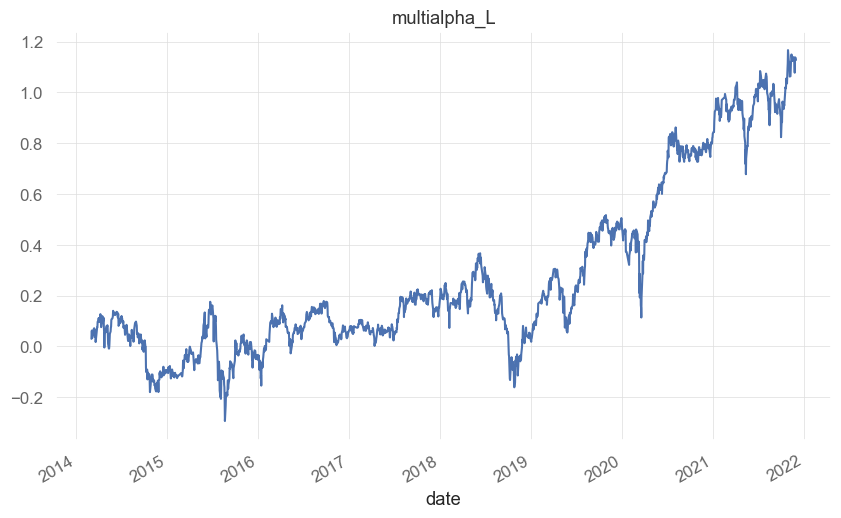

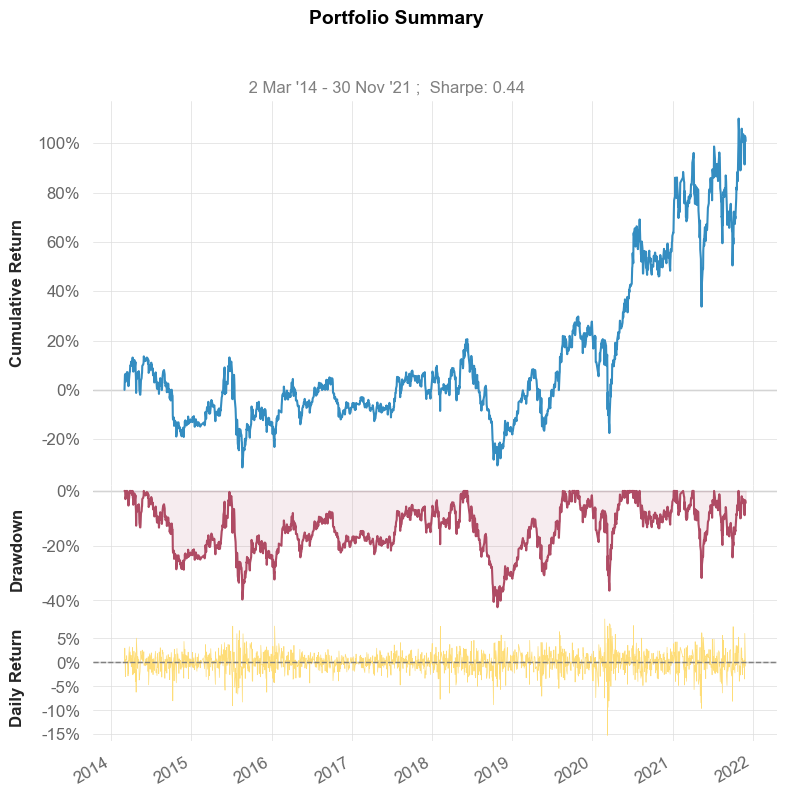

TypeError: pivot() takes 1 positional argument but 4 were given

In [17]:
stocks = 10
result_df = result_df[small_aum_Filter]
top = result_df.apply(lambda row: row.nlargest(stocks), axis=1).fillna(0)
top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if 0.001 < value < 0.975:
        print(f"Error at index {index}: value is {value}")
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns_財務因子_long = daily_profit - daily_fee

daily_returns_財務因子_long.cumsum().plot(title = 'multialpha_L')

qs.reports.basic(daily_returns_財務因子_long, Benchmark)

### 回測因子2 投信持股市值

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_14355/401466503.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)


                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2014-03-03  2014-03-03
End Period          2020-11-30  2020-11-30
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      100.0%

Cumulative Return   56.24%      61.92%
CAGR﹪              6.83%       7.4%

Sharpe              0.42        0.54
Prob. Sharpe Ratio  85.84%      91.4%
Sortino             0.57        0.74
Sortino/√2          0.4         0.52
Omega               1.08        1.08

Max Drawdown        -41.99%     -31.43%
Longest DD Days     903         748

Gain/Pain Ratio     0.08        0.11
Gain/Pain (1M)      0.42        0.58

Payoff Ratio        0.88        0.85
Profit Factor       1.08        1.11
Common Sense Ratio  0.99        1.06
CPC Index           0.51        0.51
Tail Ratio          0.92        0.96
Outlier Win Ratio   2.94        4.29
Outlier Loss Ratio  3.17        4.57

MTD                 12.65%      10.02%
3M                  11.29%      9.97%

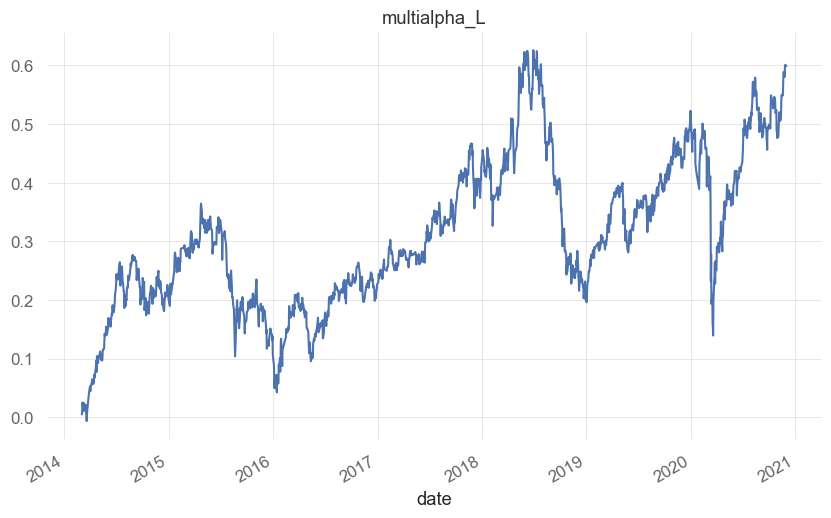

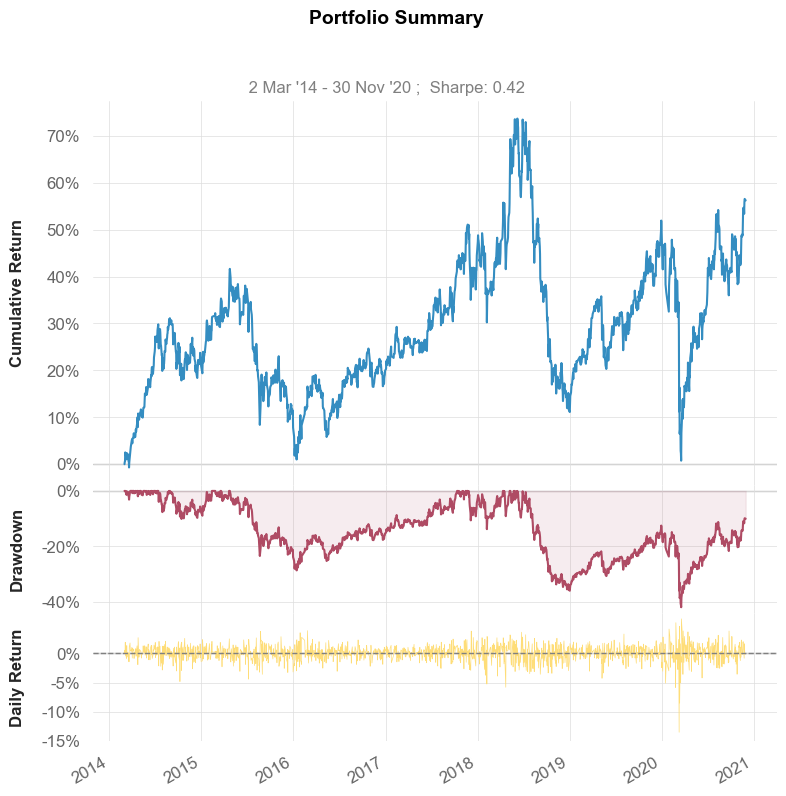

TypeError: pivot() takes 1 positional argument but 4 were given

In [8]:
stocks = 10
result_df = alpha_3_w[small_aum_Filter]
top = result_df.apply(lambda row: row.nlargest(stocks), axis=1).fillna(0)
top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if 0.001 < value < 0.975:
        print(f"Error at index {index}: value is {value}")
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2014-03-01' # '2014-05-09'
end_time = '2020-11-30'
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns_投信持股市值_long = daily_profit - daily_fee

daily_returns_投信持股市值_long.cumsum().plot(title = 'multialpha_L')

qs.reports.basic(daily_returns_投信持股市值_long, Benchmark)

### 回測因子3 投信週轉率

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_14355/1099508101.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)


                    Strategy    Benchmark
------------------  ----------  -----------
Start Period        2014-03-03  2014-03-03
End Period          2020-11-30  2020-11-30
Risk-Free Rate      0.0%        0.0%
Time in Market      100.0%      100.0%

Cumulative Return   64.86%      61.92%
CAGR﹪              7.69%       7.4%

Sharpe              0.39        0.54
Prob. Sharpe Ratio  84.26%      91.4%
Sortino             0.55        0.74
Sortino/√2          0.39        0.52
Omega               1.07        1.07

Max Drawdown        -46.97%     -31.43%
Longest DD Days     813         748

Gain/Pain Ratio     0.07        0.11
Gain/Pain (1M)      0.43        0.58

Payoff Ratio        0.93        0.86
Profit Factor       1.07        1.11
Common Sense Ratio  0.97        1.06
CPC Index           0.53        0.52
Tail Ratio          0.9         0.96
Outlier Win Ratio   2.75        6.5
Outlier Loss Ratio  2.64        6.06

MTD                 4.38%       10.02%
3M                  -5.31%      9.97%


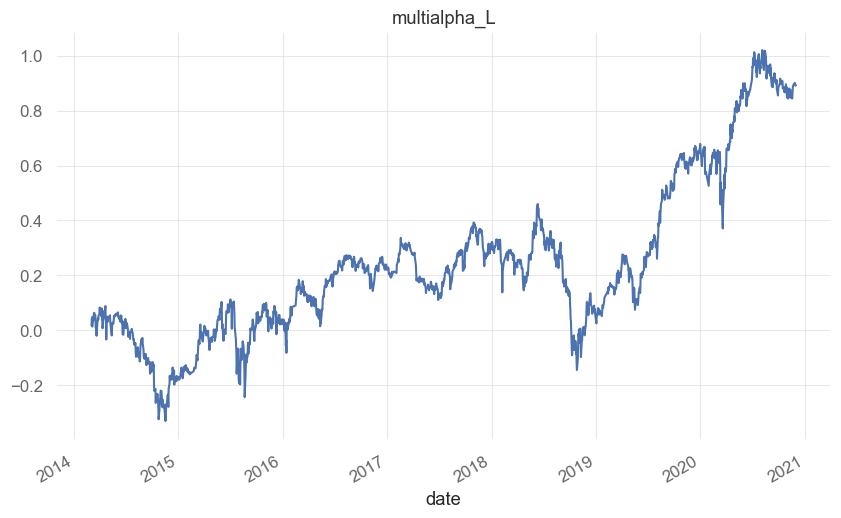

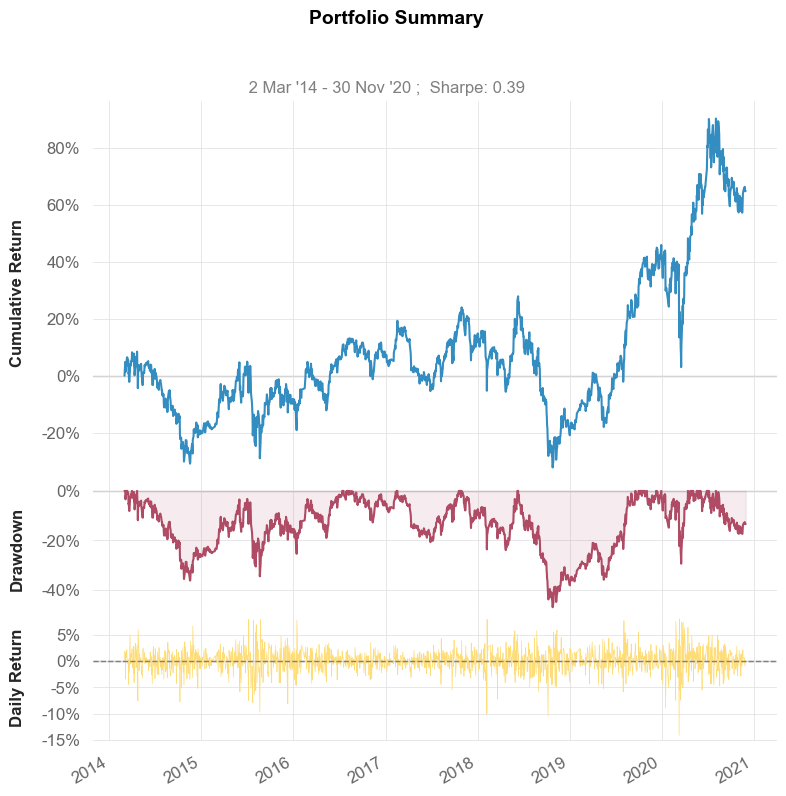

TypeError: pivot() takes 1 positional argument but 4 were given

In [9]:
stocks = 10
result_df = alpha_5_w[small_aum_Filter]
top = result_df.apply(lambda row: row.nlargest(stocks), axis=1).fillna(0)
top_equalweight = top.applymap(lambda x: 1/stocks if x != 0 else 0)
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if 0.001 < value < 0.975:
        print(f"Error at index {index}: value is {value}")
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2014-03-01' # '2014-05-09'
end_time = '2020-11-30'
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns_投信週轉率相關_long = daily_profit - daily_fee

daily_returns_投信週轉率相關_long.cumsum().plot(title = 'multialpha_L')

qs.reports.basic(daily_returns_投信週轉率相關_long, Benchmark)

### 模擬實倉(Short_Position)

In [8]:
dfs = [#W_RevenueGrowthRate,
       #W_OperatingProfit,
       #W_ROE_A_AfterTax,
       #W_NetProfitMargin_AfterTax,
       #W_GrossProfitMargin,
       W_S_GrossProfitGrowthRate,
       #W_OperatingProfitGrowthRate,
       #W_REV_m,
       W_S_REV_G_m,
       #W_REV_pers_m
       ]

# 使用 reduce 進行累加
result_df = reduce(lambda x, y: x.add(y, fill_value=0), dfs)
result_df

symbol,1101,1102,1210,1216,1301,1303,1312,1314,1319,1326,...,8299,8358,8436,8454,9904,9914,9938,9939,9945,9958
2013-01-02,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-03,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-04,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-07,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
2013-01-08,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-27,0.0,-0.005521,0.0,0.0,0.0,0.0,0.0,0.0,-0.010428,0.0,...,0.0,0.0,0.0,-0.020756,0.0,0.0,0.0,0.0,-0.020756,0.0
2023-11-28,0.0,-0.005635,0.0,0.0,0.0,0.0,0.0,0.0,-0.010410,0.0,...,0.0,0.0,0.0,-0.020779,0.0,0.0,0.0,0.0,-0.020779,0.0
2023-11-29,0.0,-0.005749,0.0,0.0,0.0,0.0,0.0,0.0,-0.010389,0.0,...,0.0,0.0,0.0,-0.020796,0.0,0.0,0.0,0.0,-0.020796,0.0
2023-11-30,0.0,-0.005829,0.0,0.0,0.0,0.0,0.0,0.0,-0.010364,0.0,...,0.0,0.0,0.0,-0.020813,0.0,0.0,0.0,0.0,-0.020813,0.0


### 空部位最近一期訊號

In [9]:
stocks = 10
result_df = result_df[small_aum_Filter2]
top = result_df.apply(lambda row: row.nsmallest(stocks), axis=1)#.fillna(0)
df_cleaned = top.loc['2023-11-25':'2023-11-30'].dropna(axis=1, how='all')
df_cleaned

symbol,2308,2356,2360,2474,3532,5483,6182,6245,6488,8069
2023-11-27,-0.040351,-0.041524,-0.040351,-0.044037,-0.044037,-0.040853,-0.044037,-0.044037,-0.044037,-0.044037
2023-11-28,-0.040377,-0.041555,-0.040377,-0.044079,-0.044079,-0.040882,-0.044079,-0.044079,-0.044079,-0.044079
2023-11-29,-0.040398,-0.041581,-0.040398,-0.044115,-0.044115,-0.040905,-0.044115,-0.044115,-0.044115,-0.044115
2023-11-30,-0.040445,-0.041638,-0.040445,-0.044194,-0.044194,-0.040957,-0.044194,-0.044194,-0.044194,-0.044194


### 回測

/var/folders/fx/jn0gghjd4cg68lr15nlpsbqr0000gn/T/ipykernel_5347/2932125316.py:4: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  top_equalweight = top.applymap(lambda x: -1/stocks if x != 0 else 0) # 取負號（空部位）


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass ax

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-01-02  2013-01-02
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             90.0%       100.0%

Cumulative Return          -71.42%     123.73%
CAGR﹪                     -10.84%     7.66%

Sharpe                     -0.43       0.55
Prob. Sharpe Ratio         8.42%       96.22%
Smart Sharpe               -0.42       0.54
Sortino                    -0.63       0.76
Smart Sortino              -0.62       0.74
Sortino/√2                 -0.45       0.54
Smart Sortino/√2           -0.44       0.53
Omega                      0.92        0.92

Max Drawdown               -78.27%     -31.51%
Longest DD Days            3020        748
Volatility (ann.)          22.01%      16.11%
R^2                        0.1         0.1
Information Ratio          -0.04       -0.04
Calmar                     -0.14      

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2015-08-24,2023-07-21,2023-11-30,3020,-78.270325,-77.225020
2,2014-10-15,2015-03-13,2015-07-22,280,-19.981672,-19.807269
3,2014-03-21,2014-07-22,2014-10-08,201,-15.185593,-14.939143
4,2015-08-04,2015-08-07,2015-08-20,16,-6.097852,-6.072114
5,2014-03-03,2014-03-14,2014-03-20,17,-4.408352,-3.865557


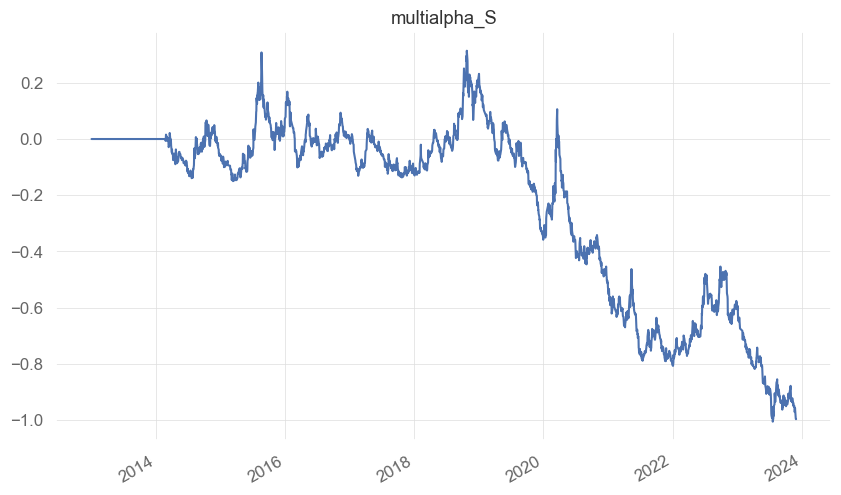

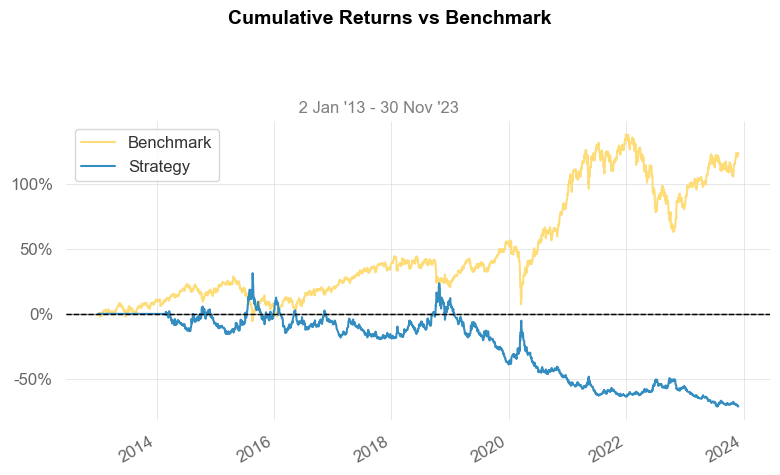

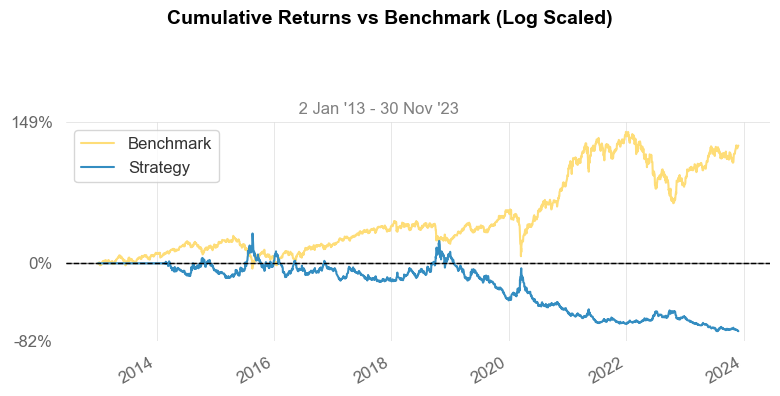

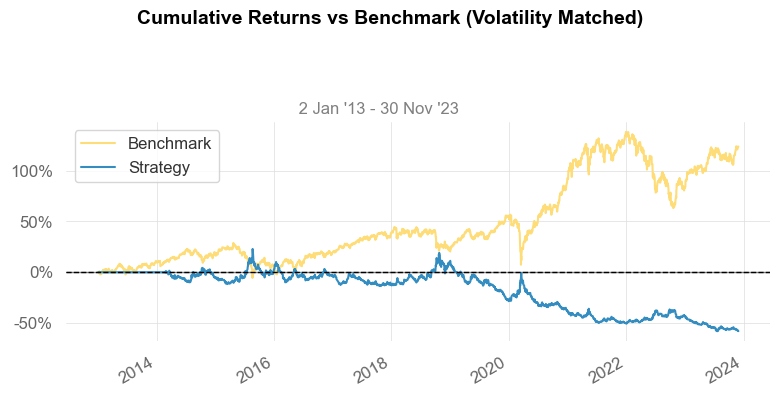

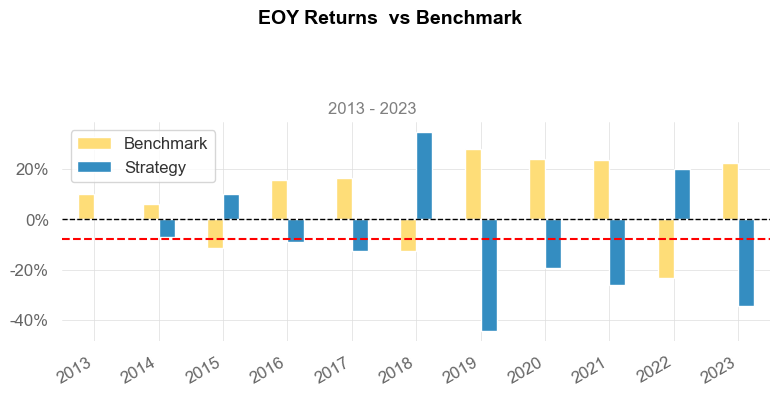

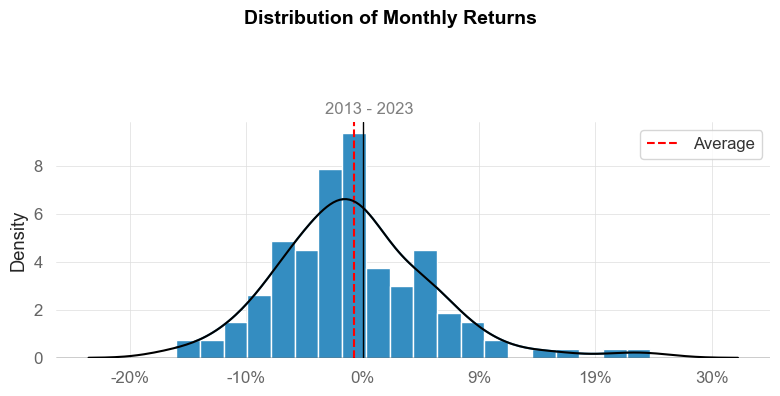

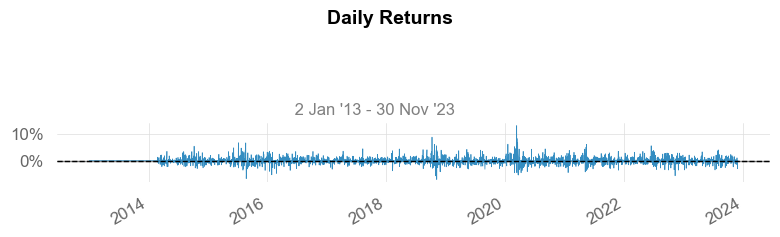

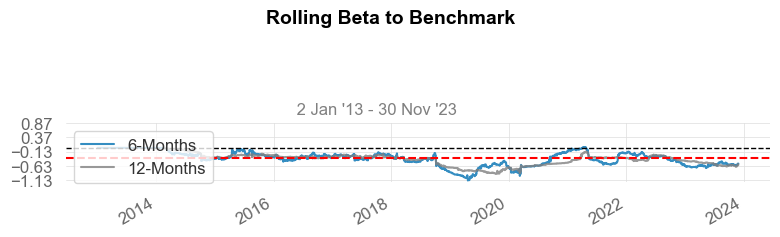

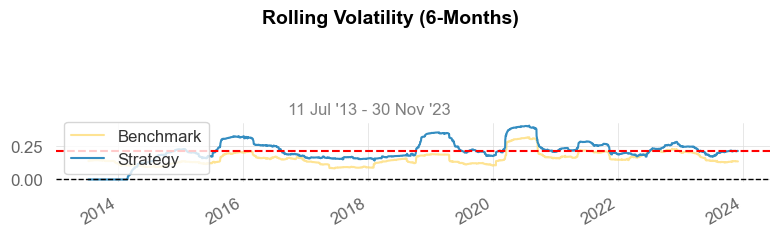

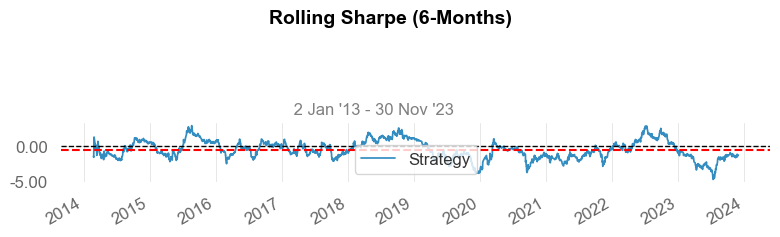

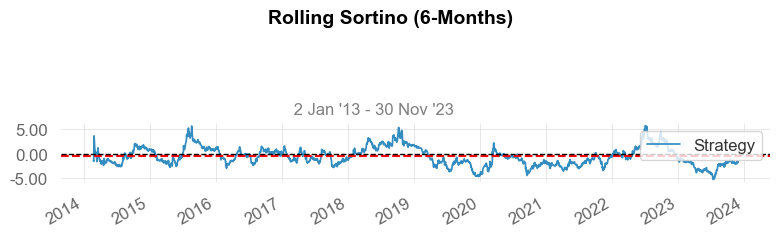

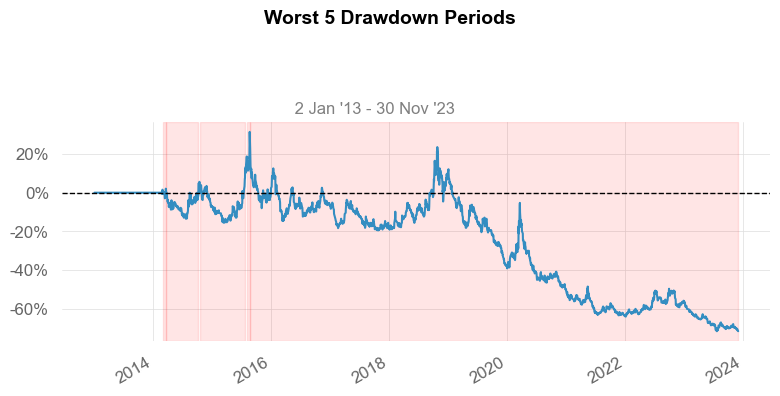

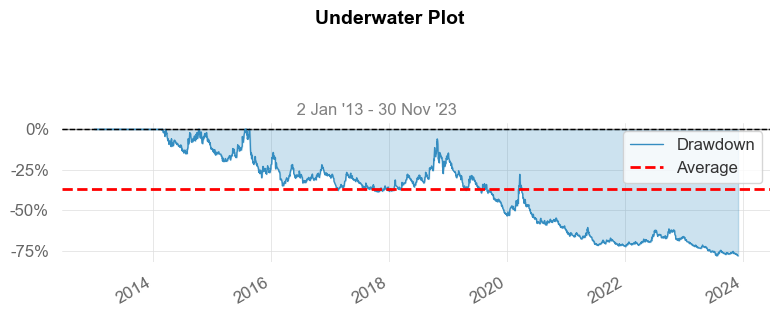

TypeError: pivot() takes 1 positional argument but 4 were given

In [10]:
stocks = 10
result_df = result_df[small_aum_Filter2]
top = result_df.apply(lambda row: row.nsmallest(stocks), axis=1).fillna(0) # 這邊是取最小的為Ｘ
top_equalweight = top.applymap(lambda x: -1/stocks if x != 0 else 0) # 取負號（空部位）
test = top_equalweight.sum(axis =1)
for index, value in test.items():
    if 0.001 < value < 0.975 | -0.001 > value > -0.975:
        print(f"Error at index {index}: value is {value}")
buy_fee:float=0.001425*0.3
sell_fee:float=0.001425*0.3+0.003
start_time = '2013-01-02' # '2014-05-09'
end_time = '2023-11-30'
# expreturn = exp_returns.loc[start_time:end_time]
# weight = result_df.loc[start_time:end_time]
weight = top_equalweight.loc[start_time:end_time]
expreturn = exp_returns .loc[start_time:end_time]
delta_weight = weight.shift(1) - weight
buy_fees = delta_weight[delta_weight > 0]*(buy_fee)
buy_fees = buy_fees.fillna(0)
sell_fees = delta_weight.abs()[delta_weight < 0]*(sell_fee)
sell_fees = sell_fees.fillna(0)
fee = buy_fees + sell_fees
daily_fee = fee.sum(axis = 1)
daily_profit = (weight * expreturn).sum(axis=1)
daily_returns_S = daily_profit - daily_fee

daily_returns_S.cumsum().plot(title = 'multialpha_S')

qs.reports.full(daily_returns_S,Benchmark)

### 多空組合

Correlation: -0.7225206274805984


/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass ax

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2013-01-02  2013-01-02
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             90.0%       100.0%

Cumulative Return          168.28%     123.73%
CAGR﹪                     9.46%       7.66%

Sharpe                     1.04        0.55
Prob. Sharpe Ratio         99.96%      96.22%
Smart Sharpe               1.02        0.54
Sortino                    1.55        0.76
Smart Sortino              1.52        0.75
Sortino/√2                 1.09        0.54
Smart Sortino/√2           1.08        0.53
Omega                      1.2         1.2

Max Drawdown               -11.31%     -31.51%
Longest DD Days            438         748
Volatility (ann.)          9.39%       16.11%
R^2                        0.0         0.0
Information Ratio          0.0         0.0
Calmar                     0.84        0.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2019-08-27,2019-12-20,2020-05-04,251,-11.305771,-11.024382
2,2022-10-06,2023-01-17,2023-04-18,194,-9.207277,-8.909205
3,2016-01-27,2016-03-29,2016-09-02,219,-8.515860,-8.425881
4,2021-05-11,2021-08-16,2022-02-07,272,-8.353933,-7.765082
5,2018-07-12,2018-11-29,2019-03-12,243,-8.133130,-7.431851


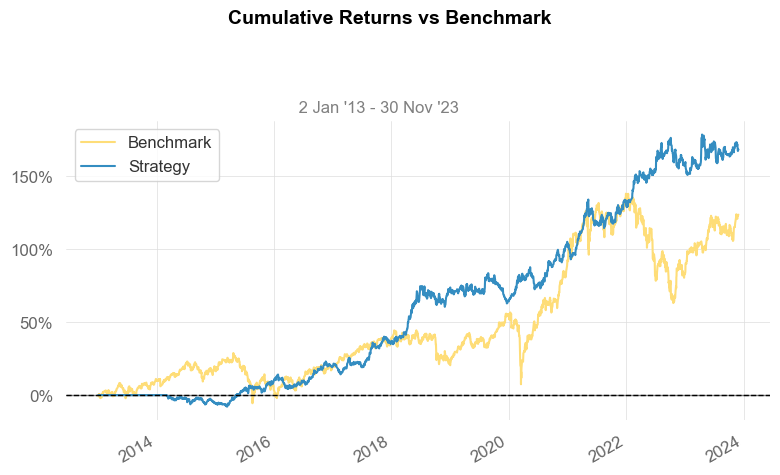

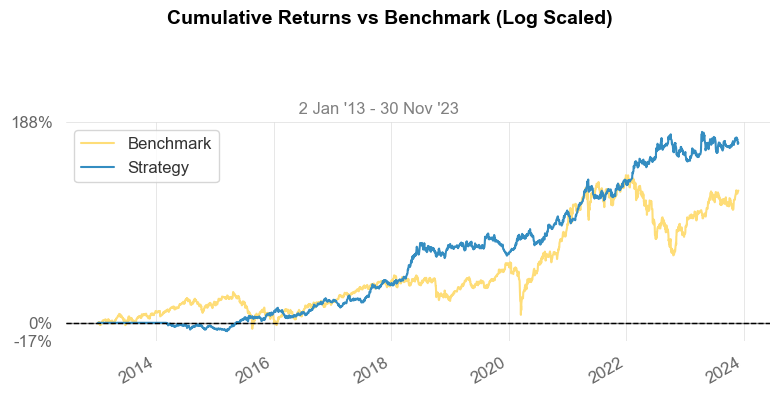

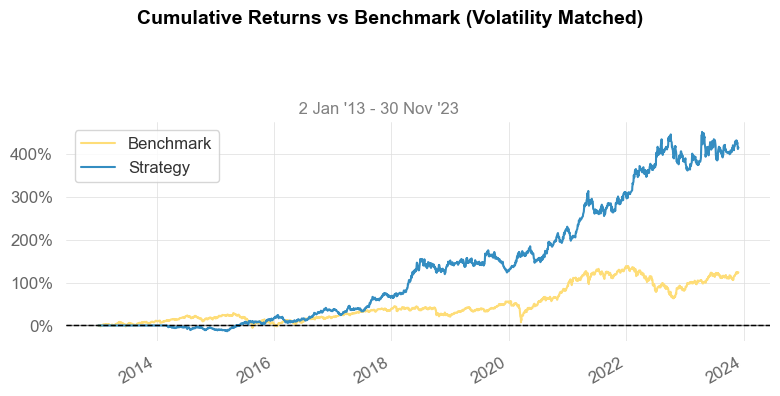

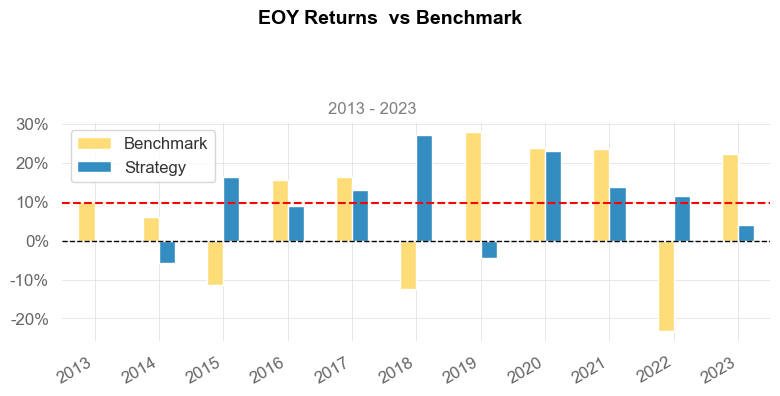

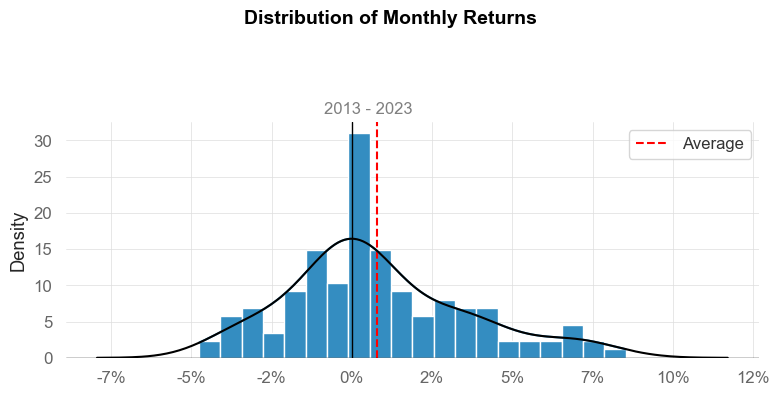

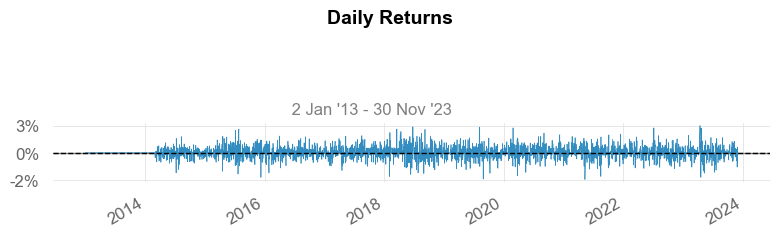

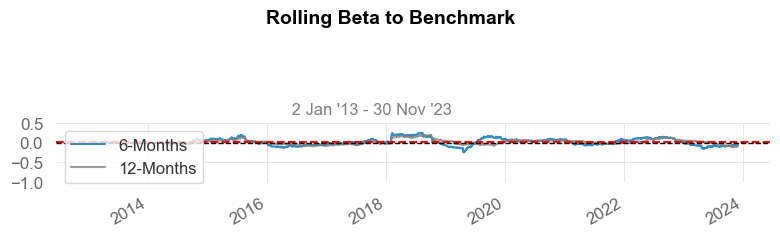

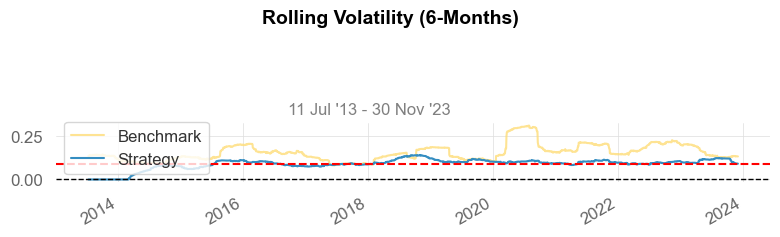

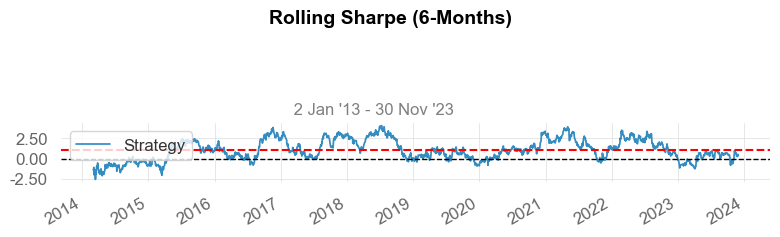

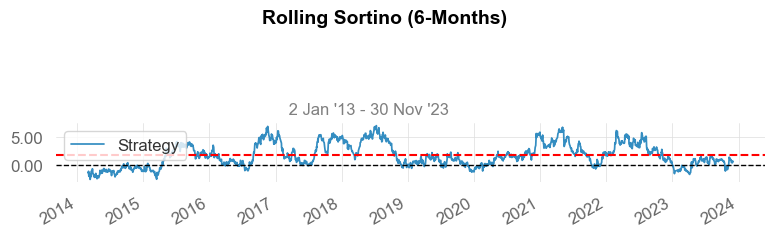

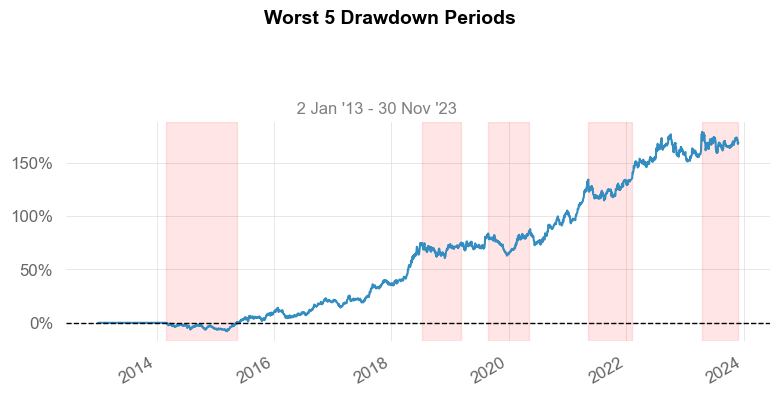

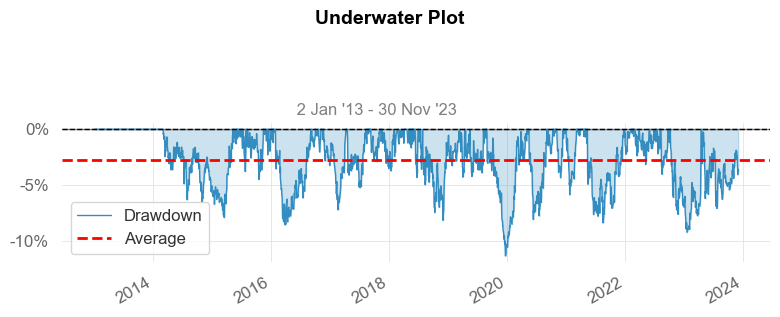

TypeError: pivot() takes 1 positional argument but 4 were given

In [11]:
correlation = daily_returns_L.loc[start_time:end_time].corr(daily_returns_S.loc[start_time:end_time])
print("Correlation:", correlation)
qs.reports.full((daily_returns_L + daily_returns_S)/2,Benchmark)

### 與大盤相關指標

In [ ]:
correlation = Benchmark.loc[start_time:end_time].corr(daily_returns_L.loc[start_time:end_time])
print("Correlation:", correlation)
volatility = daily_returns.std()
print(volatility)
volatility = Benchmark.std()
print(volatility)

0.016949107585952805
0.014870224704029749


In [8]:
correlation = 小台散戶多空比.loc[start_time:end_time].corr(daily_returns_L.loc[start_time:end_time])
correlation

-0.048845964080900174

/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)
/Users/tedting/anaconda3/envs/quant39/lib/python3.9/site-packages/numpy/core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.prod with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass ax

                           Strategy    Benchmark
-------------------------  ----------  -----------
Start Period               2014-03-03  2014-03-03
End Period                 2023-11-30  2023-11-30
Risk-Free Rate             0.0%        0.0%
Time in Market             97.0%       100.0%

Cumulative Return          670.94%     101.8%
CAGR﹪                     23.3%       7.47%

Sharpe                     1.52        0.53
Prob. Sharpe Ratio         100.0%      94.72%
Smart Sharpe               1.44        0.5
Sortino                    2.18        0.73
Smart Sortino              2.07        0.69
Sortino/√2                 1.54        0.52
Smart Sortino/√2           1.46        0.49
Omega                      1.31        1.31

Max Drawdown               -24.98%     -31.51%
Longest DD Days            306         748
Volatility (ann.)          14.9%       16.5%
R^2                        0.07        0.07
Information Ratio          0.05        0.05
Calmar                     0.93        0.

None

,Start,Valley,End,Days,Max Drawdown,99% Max Drawdown
1,2020-01-14,2020-03-19,2020-05-19,126,-24.976392,-24.015387
2,2018-06-11,2018-10-09,2019-04-10,303,-20.962059,-19.892858
3,2022-03-30,2022-06-30,2022-11-30,245,-14.880242,-13.984417
4,2019-04-18,2019-05-27,2019-09-20,155,-12.914322,-12.142171
5,2014-07-24,2014-10-24,2015-05-26,306,-11.216217,-10.691871


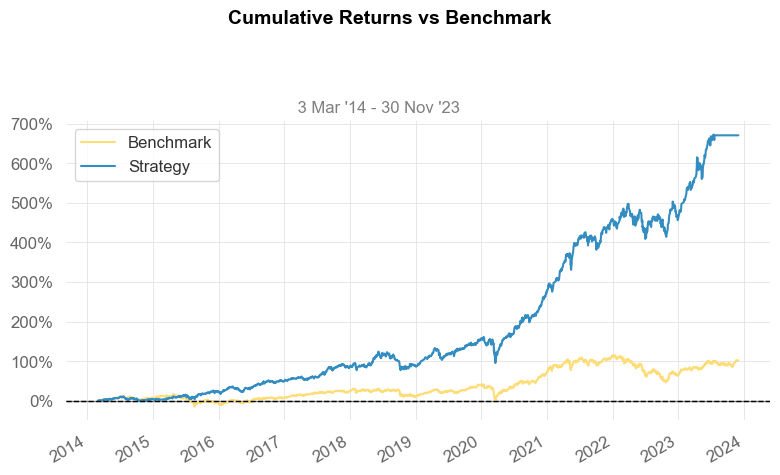

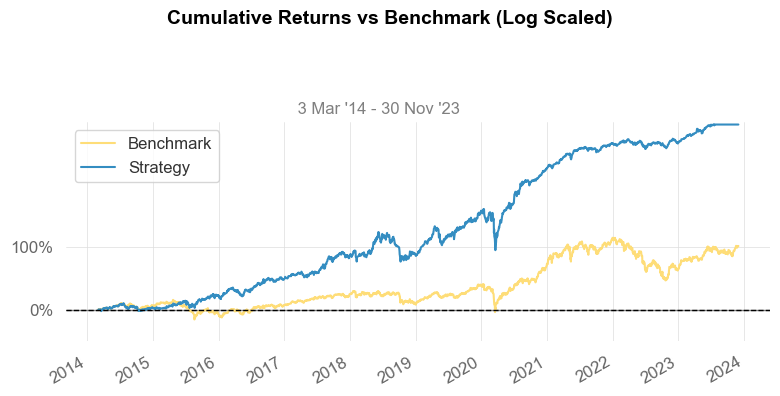

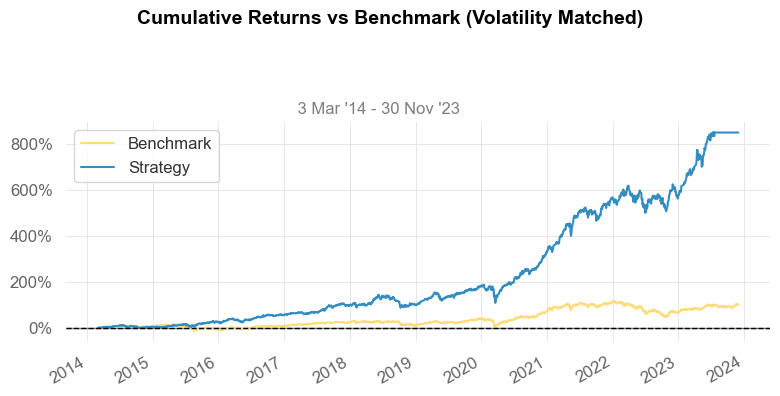

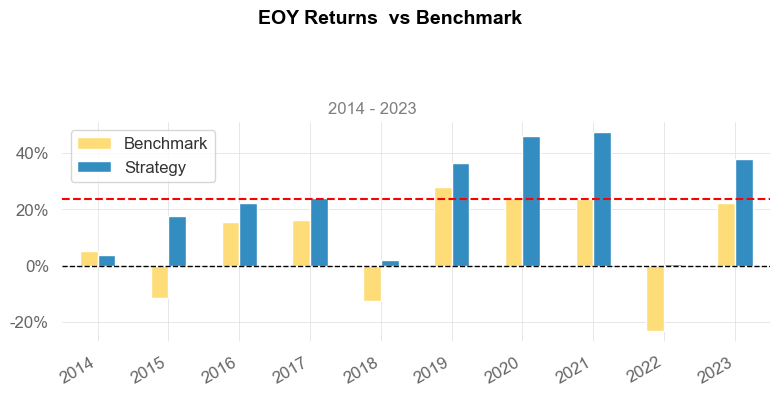

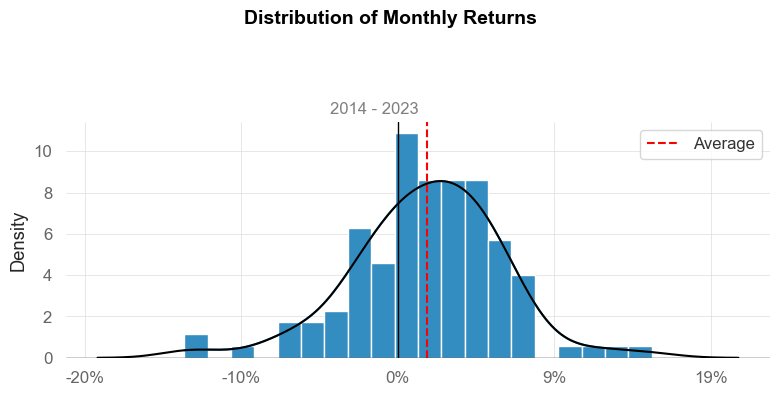

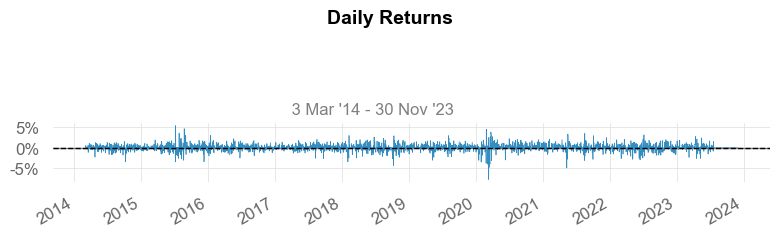

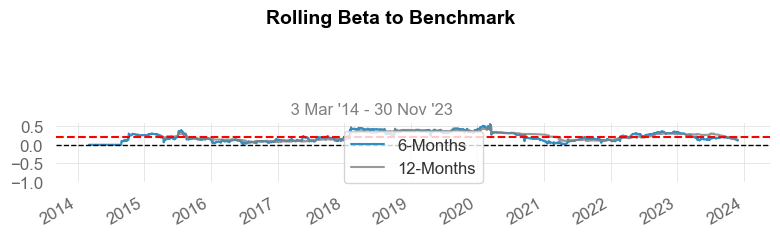

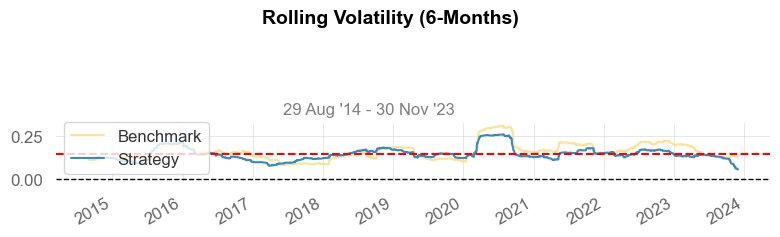

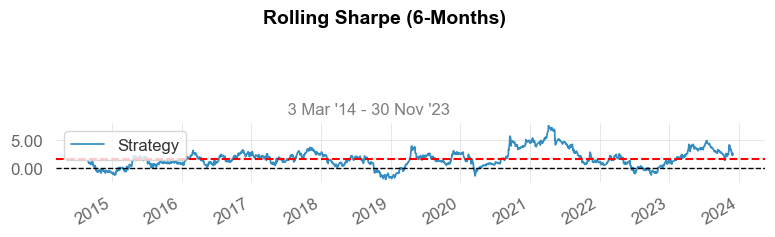

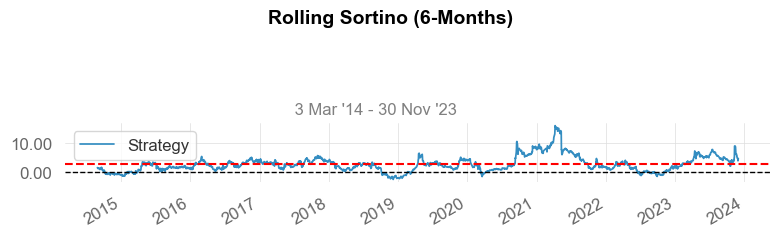

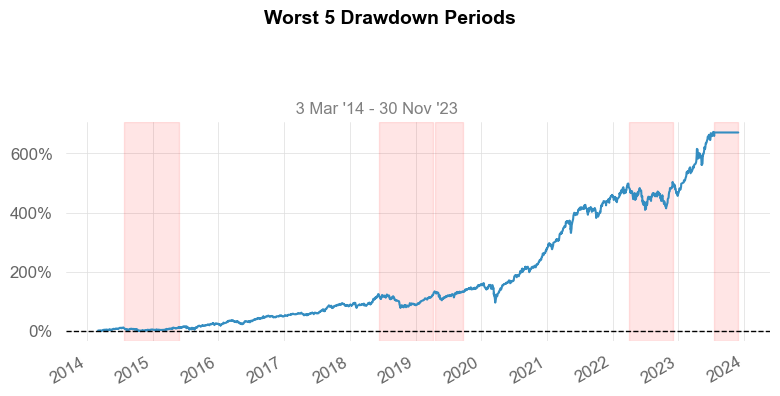

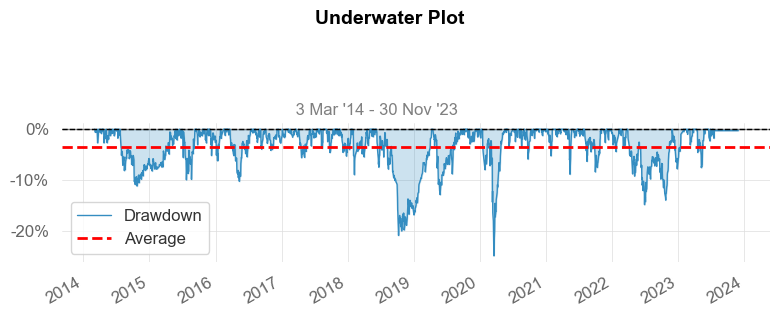

TypeError: pivot() takes 1 positional argument but 4 were given

In [12]:
qs.reports.full((daily_returns_L + 小台散戶多空比.loc[start_time:end_time])/2 ,Benchmark)

In [ ]:
def ols_regression(X, y):
    # 為 X 增加常數列
    X = np.column_stack((np.ones(X.shape[0]), X))
    
    # 使用公式計算係數：(X'X)^(-1)X'Y
    beta = np.linalg.inv(X.T @ X) @ X.T @ y
    return beta
